In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = np.loadtxt('tetramer/1-intra-BV.out',skiprows=1,max_rows=10000)
x1=data1[:,0]
r1=data1[:,1]
data2 = np.loadtxt('tetramer/2-intra-BV.out',skiprows=1,max_rows=10000)
x2=data2[:,0]
r2=data2[:,1]
data3 = np.loadtxt('tetramer/3-intra-BV.out',skiprows=1,max_rows=10000)
x3=data3[:,0]
r3=data3[:,1]
data4 = np.loadtxt('tetramer/4-intra-BV.out',skiprows=1,max_rows=10000)
x4=data4[:,0]
r4=data4[:,1]

In [3]:
data5 = np.loadtxt('monomer/monomer_prn_distance.out',skiprows=1)
x5=data5[:,0]
r5=data5[:,1]

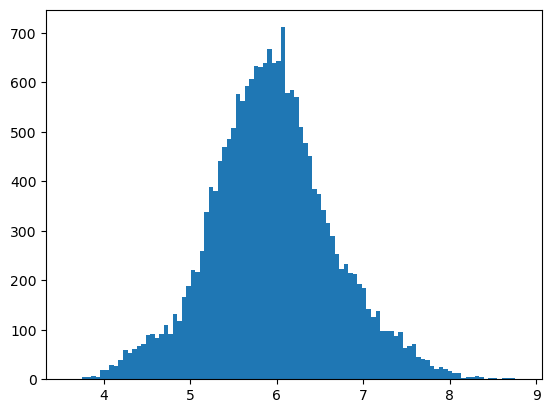

In [4]:
plt.hist(r5,bins=100)
plt.show()

In [5]:
# Load all the state vectors for all 4 biliverdins for chain-A(left) and chain-D(right) separately

m_min = 3.5
m_max = 10.0
m_values = np.arange(m_min, m_max + 0.1, 0.5)
print(m_values[8])
prn_A54_list = []
prn_A55_list = []
prn_A110_list = []
prn_A111_list = []

prn_D54_list = []
prn_D55_list = []
prn_D110_list = []
prn_D111_list = []

path_to_state_vectors='../../state_vectors/tetramer_BV_state_vectors'
for m in m_values:
    filename1 = f'{path_to_state_vectors}/{m:.1f}/prn-A_res54_pH{m:.1f}.dat'
    filename2 = f'{path_to_state_vectors}/{m:.1f}/prn-A_res55_pH{m:.1f}.dat'
    filename3 = f'{path_to_state_vectors}/{m:.1f}/prn-A_res110_pH{m:.1f}.dat'
    filename4 = f'{path_to_state_vectors}/{m:.1f}/prn-A_res111_pH{m:.1f}.dat'
    filename5 = f'{path_to_state_vectors}/{m:.1f}/prn-D_res54_pH{m:.1f}.dat'
    filename6 = f'{path_to_state_vectors}/{m:.1f}/prn-D_res55_pH{m:.1f}.dat'
    filename7 = f'{path_to_state_vectors}/{m:.1f}/prn-D_res110_pH{m:.1f}.dat'
    filename8 = f'{path_to_state_vectors}/{m:.1f}/prn-D_res111_pH{m:.1f}.dat'
    data_A54 = np.loadtxt(filename1, max_rows=100000)
    data_A55 = np.loadtxt(filename2, max_rows=100000)
    data_A110 = np.loadtxt(filename3, max_rows=100000)
    data_A111 = np.loadtxt(filename4, max_rows=100000)
    data_D54 = np.loadtxt(filename5, max_rows=100000)
    data_D55 = np.loadtxt(filename6, max_rows=100000)
    data_D110 = np.loadtxt(filename7, max_rows=100000)
    data_D111 = np.loadtxt(filename8, max_rows=100000)
    prn_A54_list.append(data_A54)
    prn_A55_list.append(data_A55)
    prn_A110_list.append(data_A110)
    prn_A111_list.append(data_A111)
    prn_D54_list.append(data_D54)
    prn_D55_list.append(data_D55)
    prn_D110_list.append(data_D110)
    prn_D111_list.append(data_D111)

prn_A54 = np.stack(prn_A54_list, axis=0)
print(prn_A54.shape)
prn_A55 = np.stack(prn_A55_list, axis=0)
print(prn_A55.shape)
prn_A110 = np.stack(prn_A110_list, axis=0)
print(prn_A110.shape)
prn_A111 = np.stack(prn_A111_list, axis=0)
print(prn_A111.shape)
prn_D54 = np.stack(prn_D54_list, axis=0)
print(prn_D54.shape)
prn_D55 = np.stack(prn_D55_list, axis=0)
print(prn_D55.shape)
prn_D110 = np.stack(prn_D110_list, axis=0)
print(prn_D110.shape)
prn_D111 = np.stack(prn_D111_list, axis=0)
print(prn_D111.shape)

7.5
(14, 100000)
(14, 100000)
(14, 100000)
(14, 100000)
(14, 100000)
(14, 100000)
(14, 100000)
(14, 100000)


In [6]:
# Frames are written every 1000 steps and MC step is every 100 steps. So every 10nth protonation state
# corresponds to the frame written in the output and visualized in VMD.

# Pluck every 10th value from each state vector to match them with trajectory frames!
prn_A54_10th = prn_A54[:, ::10]
prn_A55_10th = prn_A55[:, ::10]
prn_A110_10th = prn_A110[:, ::10]
prn_A111_10th = prn_A111[:, ::10]
prn_D54_10th = prn_D54[:, ::10]
prn_D55_10th = prn_D55[:, ::10]
prn_D110_10th = prn_D110[:, ::10]
prn_D111_10th = prn_D111[:, ::10]

print(prn_A54_10th.shape)
print(prn_A55_10th.shape)
print(prn_A110_10th.shape)
print(prn_A111_10th.shape)
print(prn_D54_10th.shape)
print(prn_D55_10th.shape)
print(prn_D110_10th.shape)
print(prn_D111_10th.shape)

(14, 10000)
(14, 10000)
(14, 10000)
(14, 10000)
(14, 10000)
(14, 10000)
(14, 10000)
(14, 10000)


In [7]:
singly_prot_54 = prn_A54_10th+prn_D54_10th
singly_prot_55 = prn_A55_10th+prn_D55_10th
singly_prot_110 = prn_A110_10th+prn_D110_10th
singly_prot_111 = prn_A111_10th+prn_D111_10th
unique_elements = np.unique(singly_prot_54)
print(unique_elements) # You can add prn-A and prn-D and get the state vector of both chains at the same time
# Then you can weight the graph based on 0, 1 or 2 protons

[0. 1. 2.]


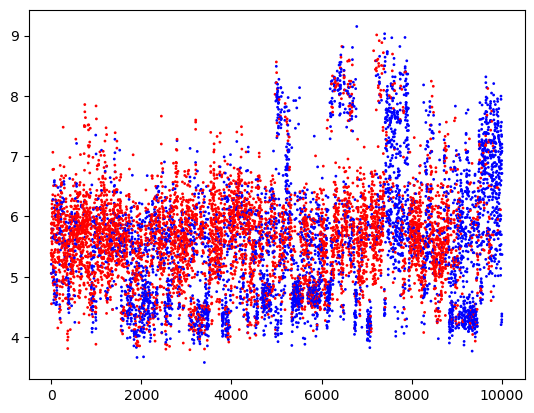

In [8]:
colors = ['red' if val == 0 else 'blue' for val in singly_prot_54[8]] # [8] array corresponds to pH=7.5
plt.scatter(x1, r1, color=colors, s=1)
plt.show()

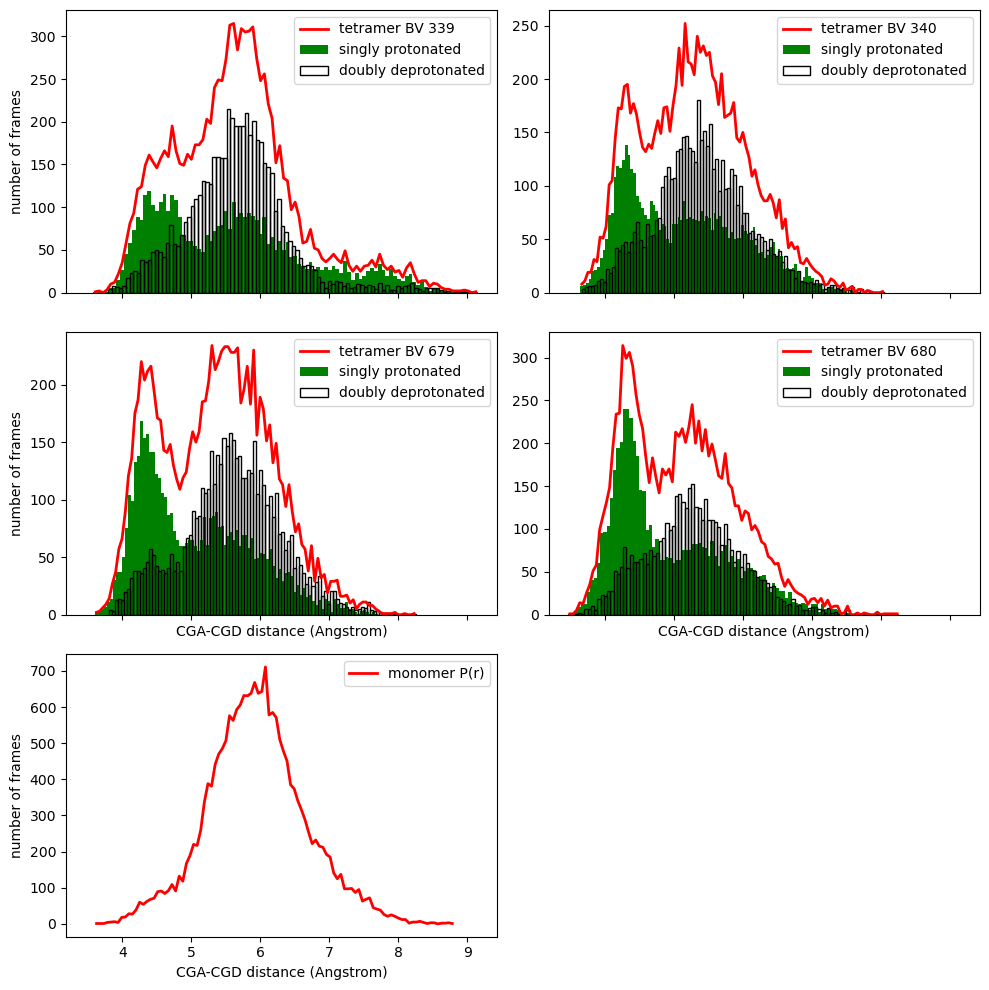

In [9]:
num_bins=100

rho1, bins1 = np.histogram(r1,bins=num_bins)
x_center1=(bins1[:-1]+bins1[1:])/2
rho2, bins2 = np.histogram(r2,bins=num_bins)
x_center2=(bins2[:-1]+bins2[1:])/2
rho3, bins3 = np.histogram(r3,bins=num_bins)
x_center3=(bins3[:-1]+bins3[1:])/2
rho4, bins4 = np.histogram(r4,bins=num_bins)
x_center4=(bins4[:-1]+bins4[1:])/2
rho5, bins5 = np.histogram(r5,bins=num_bins)
x_center5=(bins5[:-1]+bins5[1:])/2

y_zeros1 = [y_val for y_val, flag in zip(r1, singly_prot_54[8]) if flag == 0]
y_ones1 = [y_val for y_val, flag in zip(r1, singly_prot_54[8]) if flag == 1]

y_zeros2 = [y_val for y_val, flag in zip(r2, singly_prot_55[8]) if flag == 0]
y_ones2 = [y_val for y_val, flag in zip(r2, singly_prot_55[8]) if flag == 1]

y_zeros3 = [y_val for y_val, flag in zip(r3, singly_prot_110[8]) if flag == 0]
y_ones3 = [y_val for y_val, flag in zip(r3, singly_prot_110[8]) if flag == 1]

y_zeros4 = [y_val for y_val, flag in zip(r4, singly_prot_111[8]) if flag == 0]
y_ones4 = [y_val for y_val, flag in zip(r4, singly_prot_111[8]) if flag == 1]

fig, axs = plt.subplots(3, 2, figsize=(10, 10), sharey=False, sharex=True) 
axs = axs.flatten()

for i in range(5, len(axs)):
    fig.delaxes(axs[i])

axs[0].plot(x_center1,rho1,lw=2, color='red', label='tetramer BV 339')
axs[0].hist(y_ones1, bins=num_bins, color='green', label='singly protonated')
axs[0].hist(y_zeros1, bins=num_bins, color='Salmon', label='doubly deprotonated',fill=False)
axs[0].legend()
axs[1].plot(x_center2,rho2,lw=2, color='red', label='tetramer BV 340')
axs[1].hist(y_ones2, bins=num_bins, color='green',  label='singly protonated')
axs[1].hist(y_zeros2, bins=num_bins, color='Salmon',  label='doubly deprotonated',fill=False)
axs[1].legend()
axs[2].plot(x_center3,rho3,lw=2, color='red', label='tetramer BV 679')
axs[2].hist(y_ones3, bins=num_bins, color='green',  label='singly protonated')
axs[2].hist(y_zeros3, bins=num_bins, color='Salmon', label='doubly deprotonated',fill=False)
axs[2].legend()
axs[3].plot(x_center4,rho4,lw=2, color='red', label='tetramer BV 680')
axs[3].hist(y_ones4, bins=num_bins, color='green',  label='singly protonated')
axs[3].hist(y_zeros4, bins=num_bins, color='Salmon', label='doubly deprotonated',fill=False)
axs[3].legend()
axs[0].set_ylabel('number of frames')
axs[2].set_ylabel('number of frames')
axs[2].set_xlabel('CGA-CGD distance (Angstrom)')
axs[3].set_xlabel('CGA-CGD distance (Angstrom)')
axs[4].plot(x_center5,rho5,lw=2, color='red', label='monomer P(r)')
axs[4].set_xlabel('CGA-CGD distance (Angstrom)')
axs[4].set_ylabel('number of frames')
axs[4].legend(loc='best')
plt.tight_layout()
plt.show()

In [10]:
from scipy.optimize import curve_fit

rho1, bins1 = np.histogram(r1,bins=num_bins,density=True)
x_center1=(bins1[:-1]+bins1[1:])/2
rho2, bins2 = np.histogram(r2,bins=num_bins,density=True)
x_center2=(bins2[:-1]+bins2[1:])/2
rho3, bins3 = np.histogram(r3,bins=num_bins,density=True)
x_center3=(bins3[:-1]+bins3[1:])/2
rho4, bins4 = np.histogram(r4,bins=num_bins,density=True)
x_center4=(bins4[:-1]+bins4[1:])/2
rho5, bins5 = np.histogram(r5,bins=num_bins,density=True)
x_center5=(bins5[:-1]+bins5[1:])/2

def double_gaussian(x, amp1, mean1, stddev1, amp2, mean2, stddev2):
    gauss1 = amp1 * np.exp(-(x - mean1) ** 2 / (2 * stddev1 ** 2))
    gauss2 = amp2 * np.exp(-(x - mean2) ** 2 / (2 * stddev2 ** 2))
    return gauss1 + gauss2

def single_gaussian(x, amp1, mean1, stddev1):
    gauss = amp1 * np.exp(-(x - mean1) ** 2 / (2 * stddev1 ** 2))
    return gauss

popt1, _ = curve_fit(double_gaussian, x_center1, rho1, p0=[0.1, 5, 1, 0.5, 6, 1])
popt2, _ = curve_fit(double_gaussian, x_center2, rho2, p0=[0.1, 4.5, 1, 0.5, 5.5, 1])
popt3, _ = curve_fit(double_gaussian, x_center3, rho3, p0=[0.1, 4.5, 1, 0.5, 6, 1])
popt4, _ = curve_fit(double_gaussian, x_center4, rho4, p0=[0.1, 4.5, 1, 0.5, 5.5, 1])
popt5, _ = curve_fit(single_gaussian, x_center5, rho5, p0=[0.1, 6, 1])

print(popt1[1],popt1[4])
print(popt2[1],popt2[4])
print(popt3[1],popt3[4])
print(popt4[1],popt4[4])
print(popt5[1])

4.479056551075874 5.7128352125603685
4.268195034547846 5.354414018722455
4.317838390923837 5.578851365056877
4.284276343805636 5.292285011365507
5.907745614150936


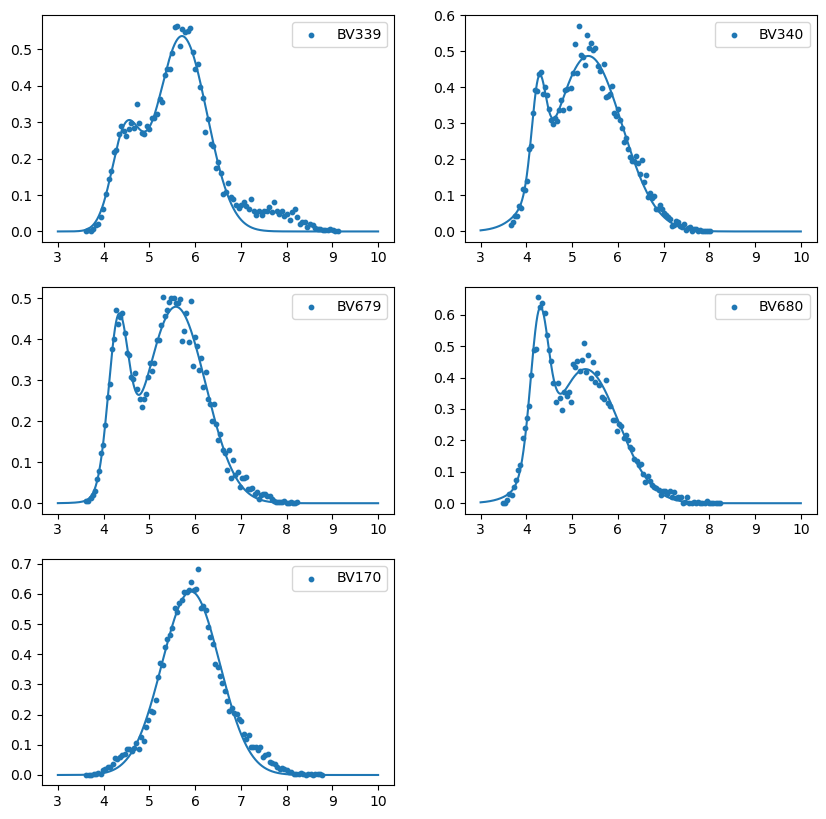

In [11]:
labels=['BV339','BV340','BV679','BV680', 'BV170']
colors=['blue','red','green','black', 'magenta']
x_prime=np.arange(3,10,0.001)
fig, axs = plt.subplots(3, 2, figsize=(10, 10), sharey=False, sharex=False) 
axs = axs.flatten()

for i in range(5, len(axs)):
    fig.delaxes(axs[i])
axs[0].scatter(x_center1,rho1,s=10,label=labels[0])
axs[0].plot(x_prime, double_gaussian(x_prime,popt1[0],popt1[1],popt1[2],popt1[3],popt1[4],popt1[5]))
#axs[0].axvline(x=popt1[1],linestyle='--')
#axs[0].axvline(x=popt1[4],linestyle='--')
axs[0].legend()
axs[1].scatter(x_center2,rho2,s=10,label=labels[1])
axs[1].plot(x_prime, double_gaussian(x_prime,popt2[0],popt2[1],popt2[2],popt2[3],popt2[4],popt2[5]))
axs[1].legend()
axs[2].scatter(x_center3,rho3,s=10,label=labels[2])
axs[2].plot(x_prime, double_gaussian(x_prime,popt3[0],popt3[1],popt3[2],popt3[3],popt3[4],popt3[5]))
axs[2].legend()
axs[3].scatter(x_center4,rho4,s=10,label=labels[3])
axs[3].plot(x_prime, double_gaussian(x_prime,popt4[0],popt4[1],popt4[2],popt4[3],popt4[4],popt4[5]))
axs[3].legend()
axs[4].scatter(x_center5,rho5,s=10,label=labels[4])
axs[4].plot(x_prime, single_gaussian(x_prime,popt5[0],popt5[1],popt5[2]))
axs[4].legend()
plt.show()

In [20]:
tet_chain_av1 = (popt1[1]+popt2[1]+popt3[1]+popt4[1])/4
tet_chain_av2 = (popt1[4]+popt2[4]+popt3[4]+popt4[4])/4
print(f"{tet_chain_av1:.2f}, {tet_chain_av2:.2f}")

4.34, 5.48


In [22]:
print(f"{popt5[1]:.2f}")

5.91
